Now the IEM function written to handle orientation data (or data arrayed over 0:179 space). This will also use an iterating method to compute a full 180 point reconstruction (instead of multiplying a 9-point function by the basis set to make it smooth). See the cell immediately below this one for a sample call. Could easily modify to handle 0:359 data. 

reading and converting: locDat.mat
reading and converting: locOri.mat
reading and converting: wmDat.mat
reading and converting: wmOri.mat


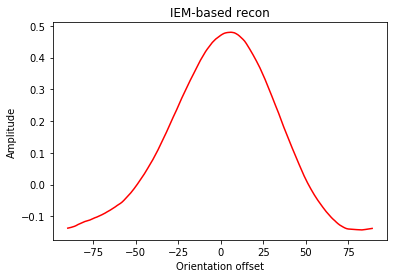

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import runIEM as iem
import labtools as lt

# run the runIEM function with some completely independent training and test data. 

num_chans = 9  # number of channels to model

# read in the mat files (and convert to npy) for the training/test data and the labels for each. 
trn_data = lt.readMatData('locDat.mat', 'locDatIEM', 'locDat')
# note the type cast to a signed int from unsigned int8...this is really really important because
# if you do basic operations that should return negative values like 90-uint8(111) then it will not
# work as anticipated!
trn_labels = np.int16(lt.readMatData('locOri.mat', 'locOriIEM', 'locDatOri'))

# read in data from the WM task
tst_data = lt.readMatData('wmDat.mat', 'wmDatIEM', 'locDat')
# note the type cast to a signed int from unsigned int8!!!!
tst_labels = np.int16(lt.readMatData('wmOri.mat', 'wmOriIEM', 'wmDatOri')) 

# def runIEM(trn_data, tst_data, trn_labels, tst_labels, num_chans):
# returns a trial x 180 point recon matrix 
cent_chan_response = iem.runIEM(trn_data, tst_data, trn_labels, tst_labels, num_chans)

# and then plot the complete 180 point reconstruction
x=np.arange(0, np.pi, np.pi/180) 
plt.plot((x-(np.pi/2))*(180/np.pi), np.mean(cent_chan_response, axis=0), color='red')          # plot 1st row of data (response on each of 320 trials)
plt.xlabel('Orientation offset')
plt.ylabel('Amplitude')
plt.title('IEM-based recon')
plt.show()